# Experiment-5:

# Aim: A* path planning algorithm using grid based path planning Approach


The A* search algorithm is a graph traversal and path search algorithm, which is often used in many fields of computer science due to its completeness, optimality, and optimal efficiency.  It's particularly well-suited for grid-based path planning, a common approach in robotics and game AI.

**Core Concepts:**

1. **Grid Representation:** The environment is represented as a grid, where each cell can be traversable (free space) or non-traversable (obstacle).  The start and goal positions are also defined as grid cells.

2. **Heuristic Function:** A crucial component of A*.  The heuristic function (h(n)) estimates the cost to reach the goal from a given node (n).  A good heuristic is crucial for A*'s efficiency.  It must be *admissible* (never overestimates the actual cost) and *consistent* (for any node n and its successor n', h(n) ≤ cost(n to n') + h(n')).  Common heuristics include Manhattan distance and Euclidean distance.

3. **Cost Function:**  The cost function (g(n)) represents the actual cost to reach node (n) from the starting node. This typically reflects the distance or effort required to traverse from one cell to another. In a simple grid, this might be just the number of steps.

4. **f(n) = g(n) + h(n):** The A* algorithm prioritizes nodes based on their f(n) value. This combines the cost so far (g(n)) and the estimated cost to the goal (h(n)). Lower f(n) values indicate more promising paths.

5. **Open and Closed Lists:**
    * **Open List:**  A priority queue containing nodes to be evaluated. Nodes are ordered by their f(n) values.
    * **Closed List:** A set containing nodes that have already been evaluated. This prevents cycles and revisiting nodes.

**Algorithm Steps:**

1. **Initialization:**
   - Place the start node in the open list.
   - Set its g(n) to 0 and calculate its f(n).

2. **Iteration:**
   - If the open list is empty, there's no path.
   - Select the node with the lowest f(n) from the open list.  This is the current node.
   - If the current node is the goal node, reconstruct and return the path.
   - Move the current node from the open list to the closed list.
   - For each valid neighbor of the current node (within grid boundaries and not an obstacle):
     - Calculate tentative g(n) for the neighbor (g(current) + cost to move from current to neighbor).
     - If the neighbor is in the closed list and the tentative g(n) is not better than its current g(n), skip it.
     - If the neighbor is not in the open list or the tentative g(n) is better than its current g(n):
       - Update the neighbor's g(n) with the tentative g(n).
       - Calculate its f(n).
       - Add or update the neighbor in the open list.
       - Set the neighbor's parent to the current node (for path reconstruction).

3. **Path Reconstruction:** Once the goal node is found, trace back from the goal node to the start node using the parent pointers to recover the path.

**Grid-Based Path Planning:**

The A* algorithm is particularly useful in grid-based environments because the neighbors of a cell are easily determined (up, down, left, right, and diagonals, depending on the allowed movements). The cost of moving between cells is usually constant or easily calculable (e.g., 1 for orthogonal moves, sqrt(2) for diagonal moves).

In summary, the A* algorithm is a powerful tool for finding optimal paths in grid-based environments. Its use of a heuristic function allows for efficient search, prioritizing promising paths towards the goal.


In [ ]:
import math
import heapq
import matplotlib.pyplot as plt

In [ ]:
class Cell:
  def __init__(self):
    self.parent_i = 0
    self.parent_j = 0
    self.f = float('inf')
    self.g = float('inf')
    self.h = 0

In [ ]:
ROW =10
COL =10

In [ ]:
def is_valid(row,col):
    return (row>= 0) and (row < ROW) and (col >= 0) and (col < COL)

In [ ]:
def is_unblocked(grid,row,col):
    return grid[row][col] == 1

In [ ]:
def is_destination(row,col,dest):
  return row == dest[0] and col == dest[1]

In [ ]:
def calculate_h_value(row,col,dest):
  return ((row - dest[0]) ** 2 + (col - dest[1]) ** 2) ** 0.5

In [ ]:
def trace_path(cell_details,dest):
  print("the path is")
  path = []
  row = dest[0]
  col = dest[1]

  while not (cell_details[row][col].parent_i == row and cell_details[row][col].parent_j == col):
    path.append((row,col))
    temp_row = cell_details[row][col].parent_i
    temp_col = cell_details[row][col].parent_j
    row = temp_row
    col = temp_col

  path.append((row,col))
  path.reverse()

  for i in path:
    print("->",i,end=" ")
  print()
  return path


In [ ]:
def a_star_search(grid, src, dest):

    if not is_valid(src[0], src[1]) or not is_valid(dest[0], dest[1]):
        print("Source or destination is invalid")
        return


    if not is_unblocked(grid, src[0], src[1]) or not is_unblocked(grid, dest[0], dest[1]):
        print("Source or the destination is blocked")
        return

    if is_destination(src[0], src[1], dest):
        print("We are already at the destination")
        return

    closed_list = [[False for a in range(COL)] for a in range(ROW)]


    cell_details = [[Cell() for b in range(COL)] for b in range(ROW)]

    i = src[0]
    j = src[1]
    cell_details[i][j].f = 0
    cell_details[i][j].g = 0
    cell_details[i][j].h = 0
    cell_details[i][j].parent_i = i
    cell_details[i][j].parent_j = j

    open_list = []
    heapq.heappush(open_list, (0.0, i, j))

    found_dest = False

    while len(open_list) > 0:

        p = heapq.heappop(open_list)


        i = p[1]
        j = p[2]
        closed_list[i][j] = True


        directions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
        for dir in directions:
            new_i = i + dir[0]
            new_j = j + dir[1]

            if is_valid(new_i, new_j) and is_unblocked(grid, new_i, new_j) and not closed_list[new_i][new_j]:

                if is_destination(new_i, new_j, dest):

                    cell_details[new_i][new_j].parent_i = i
                    cell_details[new_i][new_j].parent_j = j
                    print("The destination cell is found")

                    path = trace_path(cell_details, dest)
                    found_dest = True
                    return path
                else:

                    g_new = cell_details[i][j].g + 1.0
                    h_new = calculate_h_value(new_i, new_j, dest)
                    f_new = g_new + h_new


                    if cell_details[new_i][new_j].f == float('inf') or cell_details[new_i][new_j].f > f_new:

                        heapq.heappush(open_list, (f_new, new_i, new_j))

                        cell_details[new_i][new_j].f = f_new
                        cell_details[new_i][new_j].g = g_new
                        cell_details[new_i][new_j].h = h_new
                        cell_details[new_i][new_j].parent_i = i
                        cell_details[new_i][new_j].parent_j = j


    if not found_dest:
        print("Failed to find the destination cell")

In [ ]:
heap1 = []
heapq.heappush(heap1, 4)
heapq.heappush(heap1, 7)
heapq.heappush(heap1, 9)
heapq.heappush(heap1, 5)

print(heap1)

[4, 5, 9, 7]


In [ ]:
heap1 = [1, 3, 5, 7, 9]
print(heapq.heappop(heap1))              # Output: 1
print(heap1)

1
[3, 7, 5, 9]


In [ ]:
from ast import NodeTransformer
def visualize_grid(grid, path=None):
    fig, ax = plt.subplots()
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == 1:
                ax.plot(j, i, marker='s', color='lightgray', markersize=10)      # unblocked cells
            else:
                ax.plot(j, i, marker='s', color='black', markersize=10)          # blocked cells
    if path:
        for node in path:
            ax.plot(node[1], node[0], marker='o', color='red', markersize=10)    # A* Path
    plt.gca().invert_yaxis()                                                     # Invert y axis to match grid coordinates
                                                                                 # This function retrieves the current Axes instance from the current figure.
                                                                                 #The "gca" stands for "get current axes".
    plt.grid(True)
    plt.show()


The destination cell is found
the path is
-> (8, 0) -> (8, 1) -> (7, 2) -> (7, 3) -> (7, 4) -> (6, 5) -> (5, 5) -> (4, 5) -> (3, 4) -> (2, 5) -> (1, 6) -> (2, 7) 


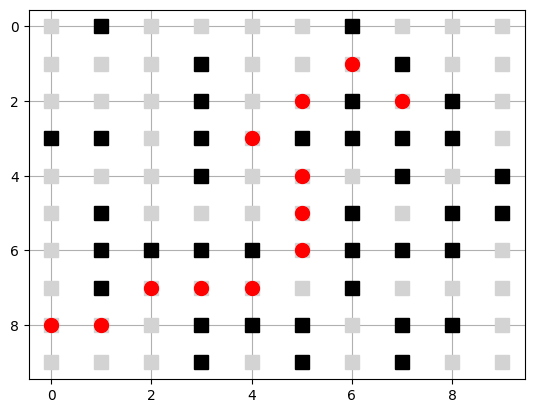

In [ ]:
def main():
    # Define the grid (1 for unblocked, 0 for blocked)
    grid = [
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
        [1, 1, 1, 0, 1, 0, 1, 0, 1, 1]
    ]

    # Define the source and destination
    src = [8, 0]
    dest = [2, 7]

    # Run the A* search algorithm
    path = a_star_search(grid, src, dest)
    visualize_grid(grid, path)

if __name__ == "__main__":
    main()

In [ ]:
import gymnasium as gym

env = gym.make("LunarLander-v3", render_mode="human")
observation, info = env.reset()

episode_over = False
while not episode_over:
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)

    episode_over = terminated or truncated

env.close()

In [ ]:
# prompt: write the conclusion of the code above in text format

The code implements the A* search algorithm for pathfinding on a grid, visualized using matplotlib.  It defines functions to check grid validity, cell accessibility, and calculate heuristics. The core `a_star_search` function uses a priority queue (heapq) to explore the grid, finding the shortest path from a source to a destination, avoiding obstacles.  Path reconstruction and visualization are handled by dedicated functions. The code then includes a demonstration of the A* algorithm on a sample grid. Finally, it provides a basic interaction with the OpenAI Gym Lunar Lander environment.


# Conclusion:
The code implements the A* search algorithm for pathfinding on a grid, visualized using matplotlib.  It defines functions to check grid validity, cell accessibility, and calculate heuristics. The core `a_star_search` function uses a priority queue (heapq) to explore the grid, finding the shortest path from a source to a destination, avoiding obstacles.  Path reconstruction and visualization are handled by dedicated functions. The code then includes a demonstration of the A* algorithm on a sample grid. Finally, it provides a basic interaction with the OpenAI Gym Lunar Lander environment.
